## Imports

In [ ]:
import pandas as pd
import numpy as np

import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [38]:
current_dir = os.getcwd()

# Go up two levels to reach the project root
project_root = os.path.abspath(os.path.join(current_dir, "../.."))

#  raw data path
data = os.path.join(project_root, "data")
file = os.path.join(data, "preprocessed_data.csv")
df = pd.read_csv(file) 

In [39]:
df.head()

,Age,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpDepartment_Development,PerformanceRating
0,32,13,10,3,4,55,3,2,4,1.0,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,1
1,47,13,14,4,4,42,3,2,1,2.0,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,1
2,40,13,5,4,4,48,2,3,1,5.0,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,2
3,41,8,10,4,2,73,2,5,4,3.0,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,1
4,60,13,16,4,1,84,3,2,1,8.0,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,1


## Train Test Split

In [40]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y )

## Scaling

In [42]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [43]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Xgboost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
results = {} # dictionary to store result
metrics_list = [] # To create a DataFrame


In [44]:
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    # Add to metrics list for DataFrame
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    })
    
    print(f"{name}:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"  \n Confusion Matrix:")
    print(f"   {results[name]['confusion_matrix']}")
    print(f"   \n Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression:
   Accuracy: 0.7708
   F1-Score: 0.7605
  
 Confusion Matrix:
   [[ 17  21   1]
 [ 12 156   7]
 [  2  12  12]]
   
 Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49        39
           1       0.83      0.89      0.86       175
           2       0.60      0.46      0.52        26

    accuracy                           0.77       240
   macro avg       0.66      0.60      0.62       240
weighted avg       0.76      0.77      0.76       240

--------------------------------------------------
Random Forest:
   Accuracy: 0.9292
   F1-Score: 0.9272
  
 Confusion Matrix:
   [[ 33   6   0]
 [  3 171   1]
 [  1   6  19]]
   
 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        39
           1       0.93      0.98      0.96       175
           2       0.95      0.73      0.83        26

    accuracy                        

In [45]:
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)


In [46]:
metrics_df.to_csv('model_metrics.csv', index=False)

In [47]:
with open('trained_models.pkl', 'wb') as f:
    pickle.dump(results, f)


### Results Visualization


In [48]:
metrics_list = []
for name, result in results.items():
    metrics_list.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1_Score': result['f1_score']
    })
metrics_df = pd.DataFrame(metrics_list)

In [49]:
plt.style.use('default')
sns.set_palette("husl")

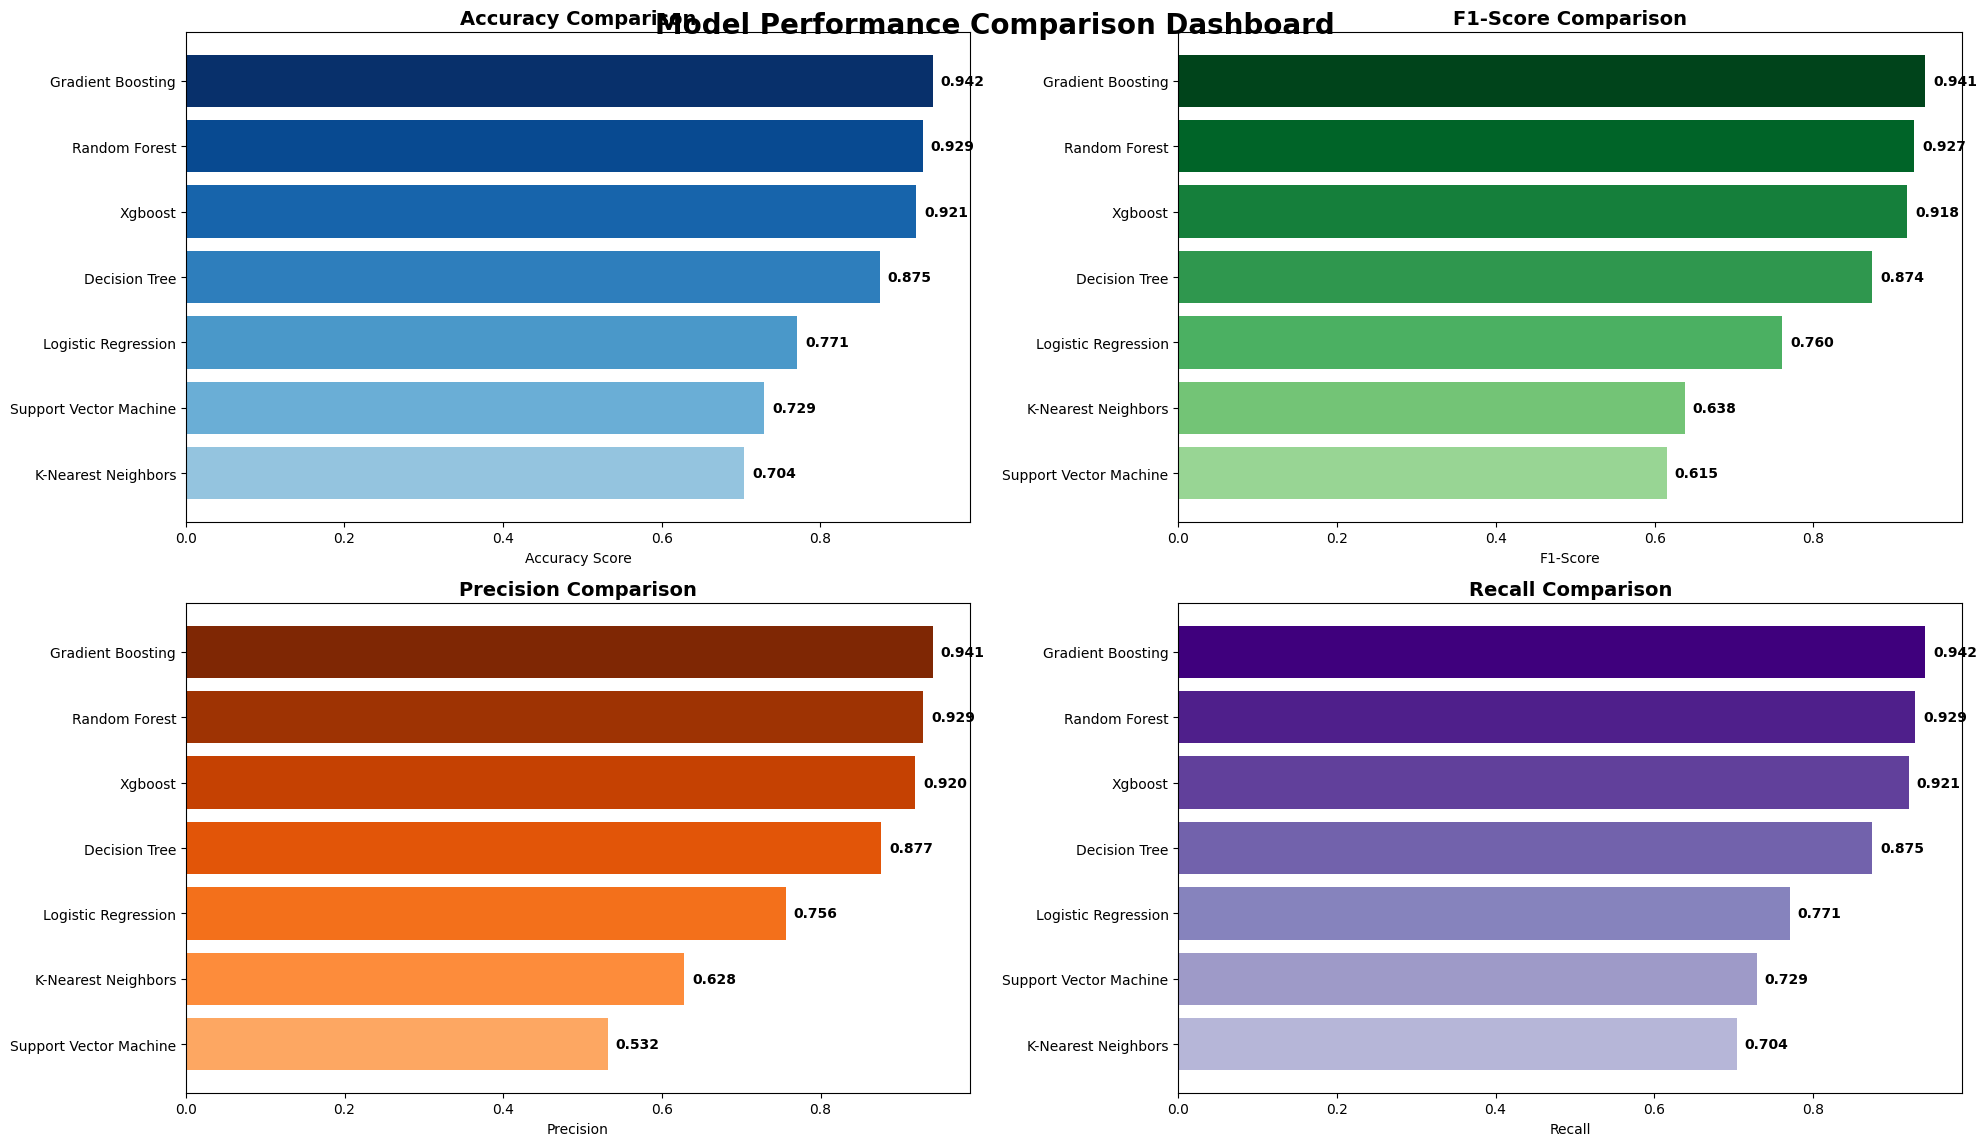

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Model Performance Comparison Dashboard', fontsize=20, fontweight='bold', y=0.95)

# Accuracy
metrics_df_sorted_acc = metrics_df.sort_values('Accuracy', ascending=True)
bars1 = axes[0,0].barh(metrics_df_sorted_acc['Model'], metrics_df_sorted_acc['Accuracy'], 
                       color=plt.cm.Blues(np.linspace(0.4, 1, len(metrics_df))))
axes[0,0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Accuracy Score')
for bar in bars1:
    width = bar.get_width()
    axes[0,0].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                   ha='left', va='center', fontweight='bold')

# F1-Score
metrics_df_sorted_f1 = metrics_df.sort_values('F1_Score', ascending=True)
bars2 = axes[0,1].barh(metrics_df_sorted_f1['Model'], metrics_df_sorted_f1['F1_Score'],
                       color=plt.cm.Greens(np.linspace(0.4, 1, len(metrics_df))))
axes[0,1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('F1-Score')
for bar in bars2:
    width = bar.get_width()
    axes[0,1].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                   ha='left', va='center', fontweight='bold')

# Precision
metrics_df_sorted_prec = metrics_df.sort_values('Precision', ascending=True)
bars3 = axes[1,0].barh(metrics_df_sorted_prec['Model'], metrics_df_sorted_prec['Precision'],
                       color=plt.cm.Oranges(np.linspace(0.4, 1, len(metrics_df))))
axes[1,0].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Precision')
for bar in bars3:
    width = bar.get_width()
    axes[1,0].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                   ha='left', va='center', fontweight='bold')

# Recall
metrics_df_sorted_rec = metrics_df.sort_values('Recall', ascending=True)
bars4 = axes[1,1].barh(metrics_df_sorted_rec['Model'], metrics_df_sorted_rec['Recall'],
                       color=plt.cm.Purples(np.linspace(0.4, 1, len(metrics_df))))
axes[1,1].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Recall')
for bar in bars4:
    width = bar.get_width()
    axes[1,1].text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                   ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

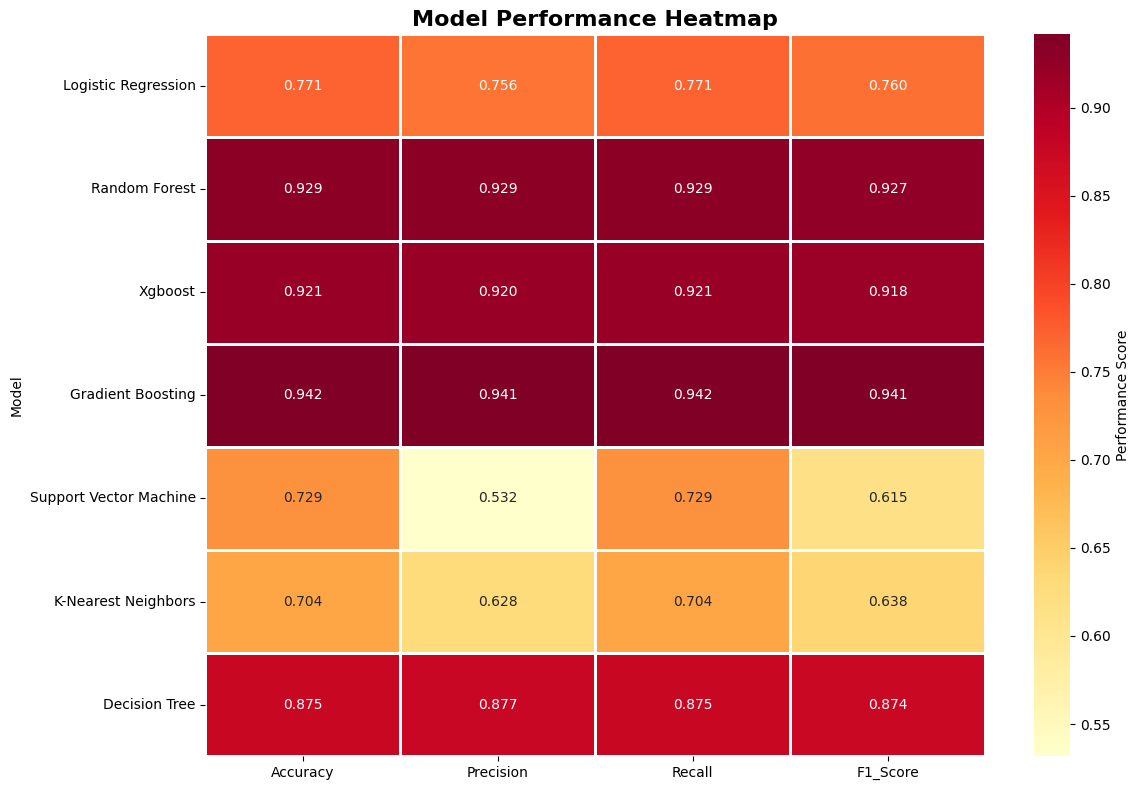

In [51]:
plt.figure(figsize=(12, 8))
metrics_heatmap = metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1_Score']]
sns.heatmap(metrics_heatmap, annot=True, cmap='YlOrRd', fmt='.3f', linewidths=1, 
            cbar_kws={'label': 'Performance Score'})
plt.title('Model Performance Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


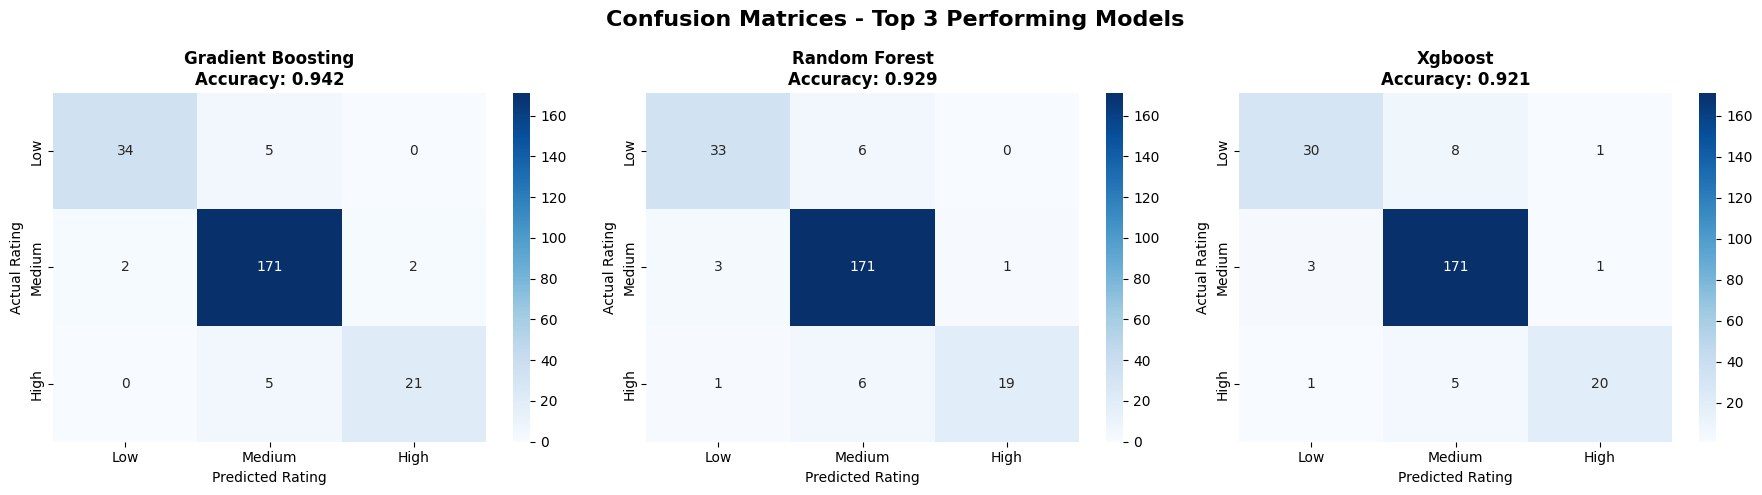

In [52]:
top_3_models = metrics_df.nlargest(3, 'F1_Score')['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices - Top 3 Performing Models', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(top_3_models):
    cm = results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Low', 'Medium', 'High'], 
                yticklabels=['Low', 'Medium', 'High'])
    accuracy = results[model_name]["accuracy"]
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.3f}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Rating')
    axes[idx].set_ylabel('Actual Rating')

plt.tight_layout()
plt.show()

### **Conclusion**

- **Best Model:**  **Gradient Boosting Classifier**
  - Highest accuracy (**94.17%**) and F1-score (**94.07%**).
  - Balanced precision and recall across all classes.
  - Handles non-linear relationships effectively, outperforming simpler and single-tree models.

- **Runner-up:** Random Forest
  - Slightly lower accuracy but still strong and stable.
  - Excellent generalization with minor trade-offs in recall for smaller classes.

- **Overall Interpretation:**
  - Ensemble methods (Gradient Boosting, Random Forest) outperform linear and distance-based algorithms.
  - Their ability to combine multiple weak learners reduces bias and variance, leading to superior overall performance.

**Recommendation:** Use the **Gradient Boosting Classifier** as the final model for deployment.